### BeautifulSoup
    BeautifulSoup은 HTML과 XML문서를 파싱하기 위한 파이썬 라이브러리
    
    BeautifulSoup parser를 사용해서 html 문서내 태그를 구조화 하고 파이썬 객체로
    만들어서 원하는 태그를 찾을 수 있도록 도와준다
    
    BeautifulSoup 라이브러리는 외부라이브러리 이기 때문에 사용하기 위해서는
    설치부터 해야한다(아나콘다는 이미 설치되어 있음) - pip install bs4
    BeautifulSoup은 인터넷 홈페이지 내용을 가지고 오는 모듈이 아니라
    호페이지 내용을 구조화해서 가져오는 모듈
    

In [1]:
!pip install beautifulsoup4

### 1. 네이버 URL 정보를 가져옴 - requests.get()
### 2. BeautifulSoup을 이용해서 파싱함

In [8]:
import requests
from bs4 import BeautifulSoup

req=requests.get("https://naver.com") #네이버 url 정보를 가져온다
html=req.text

soup = BeautifulSoup(html,'html.parser') # BeautifulSoup을 이용해서 html.parser로 파싱한다
#print(soup.prettify())

### 3. BeautifulSoup find() 단수, find_all() 복수

In [11]:
result = soup.find_all('a','thumb') #a태그와 특정 클래스등을 참조한다.
#result

news_list = []
for i in result:
    news_list.append(i.find('img')['alt']) #img태그안에 있는 alt속성의 값을 추가
print(news_list)


['디지털타임스', '지디넷코리아', '블로터', '오마이뉴스', 'MBN', '아이뉴스24', '전자신문', '스포츠서울', 'OSEN', '스포츠조선', '국민일보', '한국경제TV', '스포츠동아', 'MBC', '아시아경제', '법률신문', '스포츠Q', '나우뉴스', '사이언스타임즈', '스포츠월드', '여성신문', 'MK스포츠', '초이스경제', '한경잡앤조이']


In [19]:
# BeautifulSoup이 가지고 있는 특정  함수들...
soup.title
soup.title.name
soup.title.string

# 태그가 여러개 있더라도 항상 첫번째 태그만 가져와서 검색한다...주의
soup.img
#soup.img['alt']
#soup.img['class'] # class속성이 첫번째 img 태그에는 없기 때문에 에러난다.
soup.img['height']

import re # 정규식 표현관련 모듈...특정단어가 얼마나 들어있는지 확인
print(soup.find_all(string=re.compile("네이버")))

['네이버', '네이버를 시작페이지로', '쥬니어네이버', '네이버뉴스', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '네이버FARM TV', '네이버FARM TV', '네이버FARM TV', '네이버FARM TV', '네이버FARM TV', '네이버FARM TV', '네이버 FARM 판은 농수축산물 온라인 장터인 더농부마켓(https://smartstore.naver.com/nong-up)을 운영하고 있습니다. 네이버 플랫폼을 농수축산물 홍보의 장으로 제공해 농수축산가를 도우며 지역경제도 활성화하자는 취지에서입니다. ‘더농부마켓’에서는 스토리 있는 제품군들이 주를 이룹니다. 스토리 기반의 브랜딩을 통해 더 많은 매출이 ', '네이버 FARM 판은 농수축산물 온라인 장터인 더농부마켓(https://smartstore.naver.com/nong-up)을 운영하고 있습니다. 네이버 플랫폼을 농수축산물 홍보의 장으로 제공해 농수축산가를 도우며 지역경제도 활성화하자는 취지에서입니다. ‘더농부마켓’에서는 스토리 있는 제품군들이 주를 이룹니다. 스토리 기반의 브랜딩을 통해 더 많은 매출이 ', '네이버 검색어 제안 기능이 업데이트 됩니다.', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


### BeautifulSoup의 select_one(), select()
    find(), find_all() ---- 태그 기반 검색
    select_one(), select() ---- 선택자 기반 검색

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>, <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>, <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>, <a href="#account"><span>로그인 바로가기</span></a>, <a class="_3h-N8T9V" data-clk="dropbanner1b" href="https://whale.naver.com/details/whaleon?=main&amp;wpid=RydDy7"></a>, <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #05c3a7">다운로드</span></a>, <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</spa
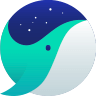
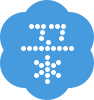

In [21]:
'''
이 부분만 보면 find(), find_all() 함수와 별다른 차이점이 없어보인다.
조금더 아래 예제를 해보자
'''
print(soup.select_one('a')) # a 태그 하나만 가져옴
print(soup.select('a')) # a태그 다 가져옴

In [23]:
# css 선택자 사용하는 기법 그대로 사용한다.
body = soup.select('body a')
#body

ul = soup.select('div>ul')
ul

[<ul class="kwd_lst _recent">
 <!-- 최근검색어 템플릿 -->
 <!-- [AU] _item 클래스를 추가해주세요. -->
 <!-- [AU] data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history">
 <a class="kwd" href="#">
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>
 </a>
 <span class="etc">
 <em class="date">@date@.</em>
 <!-- [AU] _del 클래스를 추가해주세요. -->
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>
 </span>
 </li>
 </ul>,
 <ul class="kwd_lst _kwd_list">
 <!-- [AU] 자동완성 검색어 템플릿 -->
 <!-- [AU] _item 클래스를 추가해주세요. -->
 <!-- [AU] data-rank="@rank@" data-template-type="suggestion" data-keyword="@in_txt@" attribute를 추가해주세요. -->
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="suggestion">
 <a class="kwd" href="#">
 <span class="fix"><span class="common_ico_kwd"

### BeautifulSOup get_text(), get()
    get_text() ---- 검색결과에서 태그를 제외한 텍스트만 가져옴
    get('속성') ---- 해당 속성의 값만 가져옴
    string() ---- 검색결과에서 태그안의 또다른 태그가 없는 경우에만 내용 출럭

In [26]:
text = soup.find('span', attrs={'class':'blind'})
text
text.get_text()
text.get('class')

['blind']

### BeautifulSOup 사용해서 네이버 영화 랭킹 가져오기
    1. 네이버 영화랭킹 홈페이지 접속 url, text 가져오기
       https://movie.naver.com/movie/sdb/rank/rmovie.nhn
    2. 분석작업을 하기 위해서 BeautifulSoup을 만들고 html 파서로 파싱
    
    3. 리턴된 soup객체를 분석한 결과를 영화랭킹을 찾아서 출력
       select(), find_all()

In [ ]:
import requests
from bs4 import BeautifulSoup

In [30]:
# 1. 특정사이트 url받아와서
req = requests.get("https://movie.naver.com/movie/sdb/rank/rmovie.nhn")
html=req.text

# 2. 분석작업을 하기 위해서 bs생성
soup = BeautifulSoup(html,'html.parser')

In [32]:
# 3. soup 객체를 분석해서 영화랭킹을 찾아본다. (영화랭킹 태그가 어떤 구조로....)
'''
영화랭킹 태그 구조는
div 태그의 클래스 속성의 값이 tit3
    a 태그들이 계속 반복되는 구조...
    
'''
movie_ranking_list = soup.find_all('div', class_='tit3')
for i in range(len(movie_ranking_list)):
    print("{:2}위 :{}".format(i+1, movie_ranking_list[i].get_text().strip()))

 1위 :스파이럴
 2위 :더 스파이
 3위 :분노의 질주: 더 얼티메이트
 4위 :크루즈 패밀리: 뉴 에이지
 5위 :비와 당신의 이야기
 6위 :극장판 귀멸의 칼날: 무한열차편
 7위 :내가 죽기를 바라는 자들
 8위 :아들의 이름으로
 9위 :내일의 기억
10위 :미나리
11위 :내겐 너무 소중한 너
12위 :노매드랜드
13위 :보이저스
14위 :명탐정 코난: 비색의 탄환
15위 :자산어보
16위 :링: 더 라스트 챕터
17위 :아이들은 즐겁다
18위 :키퍼스
19위 :어른들은 몰라요
20위 :혼자 사는 사람들
21위 :극장판 콩순이: 장난감나라 대모험
22위 :슈퍼노바
23위 :해리 포터와 아즈카반의 죄수
24위 :도라에몽: 스탠바이미 2
25위 :범털2 : 쩐의 전쟁
26위 :빅 피쉬
27위 :크루엘라
28위 :노바디
29위 :학교 가는 길
30위 :미스
31위 :파이터
32위 :비커밍 아스트리드
33위 :파이프라인
34위 :낙원의 밤
35위 :베놈 2: 렛 데어 비 카니지
36위 :소울
37위 :콰이어트 플레이스 2
38위 :8년을 뛰어넘은 신부
39위 :더 파더
40위 :그린 북
41위 :카오스 워킹
42위 :2067
43위 :잭 스나이더의 저스티스 리그
44위 :블랙 위도우
45위 :500일의 썸머
46위 :모탈 컴뱃
47위 :컨저링 3: 악마가 시켰다
48위 :스쿨 오브 락(樂)
49위 :서복
50위 :고질라 VS. 콩
